In [ ]:
!pip install pandas
!pip install matplotlib


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import activations
from keras import layers,models,Sequential

In [4]:
# Path to the file
file_path = './output/frame_trajectory.txt'

# Read the space-separated txt file into a DataFrame
df = pd.read_table(file_path, delim_whitespace=True, header=None, 
                   names=['timestamp', 'x', 'y', 'z', 'qx', 'qy', 'qz', 'qw'])

# Print the first 10 values of x, y, z columns
print(df[['timestamp','x', 'y', 'z']].head(3))


   timestamp         x         y         z
0   0.000000 -0.000000 -0.000000 -0.000000
1   0.166834  0.000088 -0.000263  0.014065
2   0.200200 -0.000816  0.000262  0.017842


/tmp/ipykernel_9365/829478411.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_table(file_path, delim_whitespace=True, header=None,


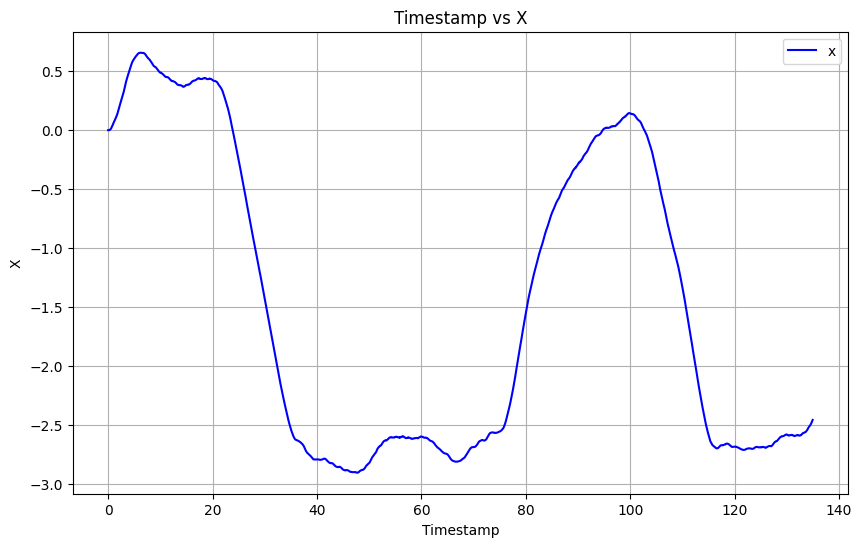

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['x'], label='x', color='b')
plt.xlabel('Timestamp')
plt.ylabel('X')
plt.title('Timestamp vs X')
plt.grid(True)
plt.legend()
plt.show()

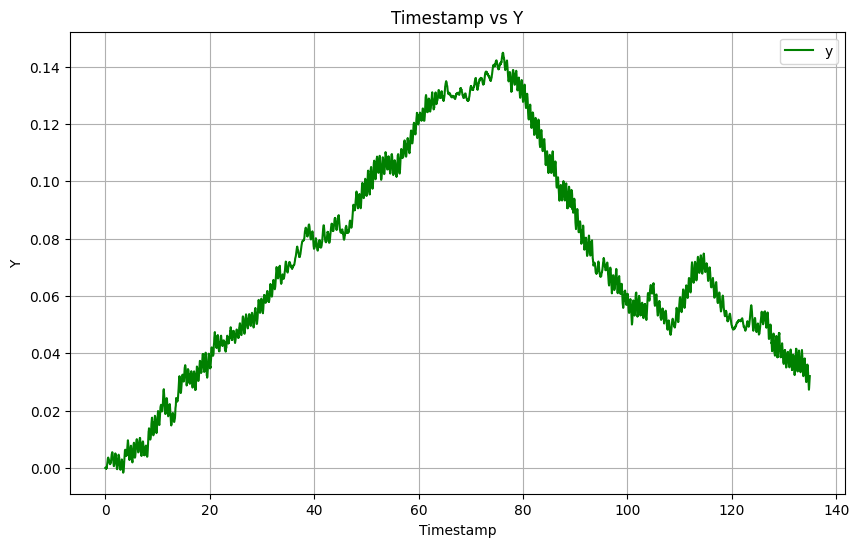

In [6]:
# Plot timestamp vs y
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['y'], label='y', color='g')
plt.xlabel('Timestamp')
plt.ylabel('Y')
plt.title('Timestamp vs Y')
plt.grid(True)
plt.legend()
plt.show()


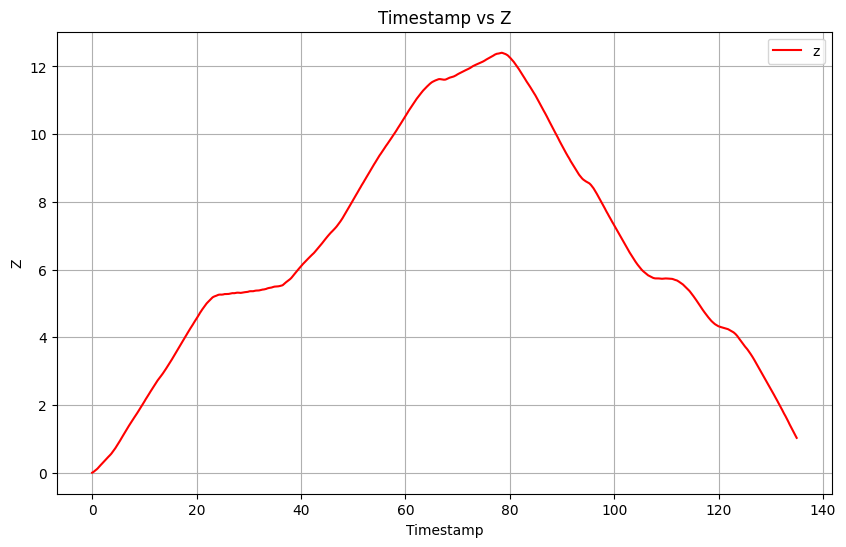

In [7]:
# Plot timestamp vs z
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['z'], label='z', color='r')
plt.xlabel('Timestamp')
plt.ylabel('Z')
plt.title('Timestamp vs Z')
plt.grid(True)
plt.legend()
plt.show()


Epoch 1/4


/home/qphulong/workspace/stella_slam_camera_rotation/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1303
Epoch 2/4
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5234
Epoch 3/4
127/127 ━━━━━━━━━━━━━━━━━━━━ -0s -3161us/step - loss: 1.1356
Epoch 4/4
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0336
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


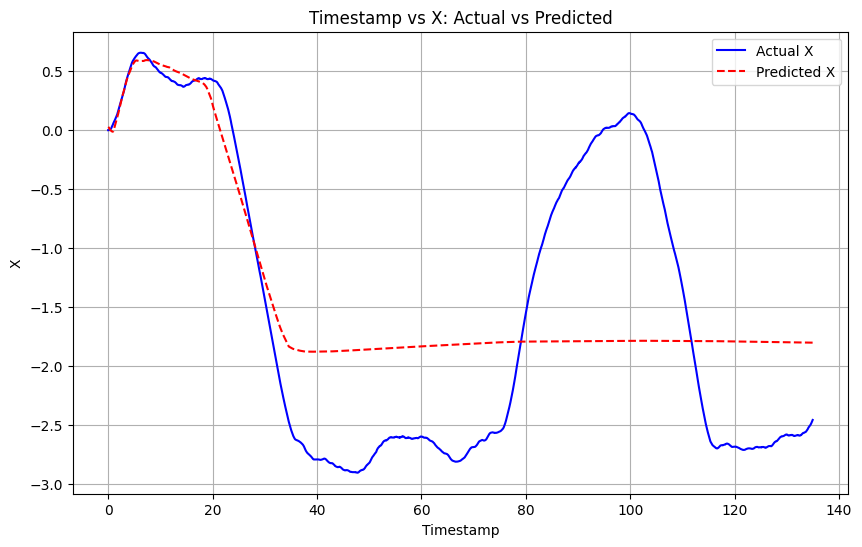

In [43]:

model = Sequential([
    keras.layers.Dense(64, activation=keras.activations.relu, input_dim=1,use_bias=True),
    keras.layers.Dense(64, activation=keras.activations.relu,use_bias=True),
    keras.layers.Dense(128, activation=keras.activations.relu,use_bias=True),
    keras.layers.Dense(256, activation=keras.activations.relu,use_bias=True),
    keras.layers.Dense(1,activation=keras.activations.linear,use_bias=True)
])

model.compile(optimizer='adam', loss='mse')

timestamps = df['timestamp'].values.reshape(-1, 1)
x_values = df['x'].values

model.fit(timestamps, x_values, epochs=4, batch_size=32)

predictions = model.predict(timestamps)

plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], x_values, label='Actual X', color='b')
plt.plot(df['timestamp'], predictions, label='Predicted X', color='r', linestyle='dashed')
plt.xlabel('Timestamp')
plt.ylabel('X')
plt.title('Timestamp vs X: Actual vs Predicted')
plt.grid(True)
plt.legend()
plt.show()

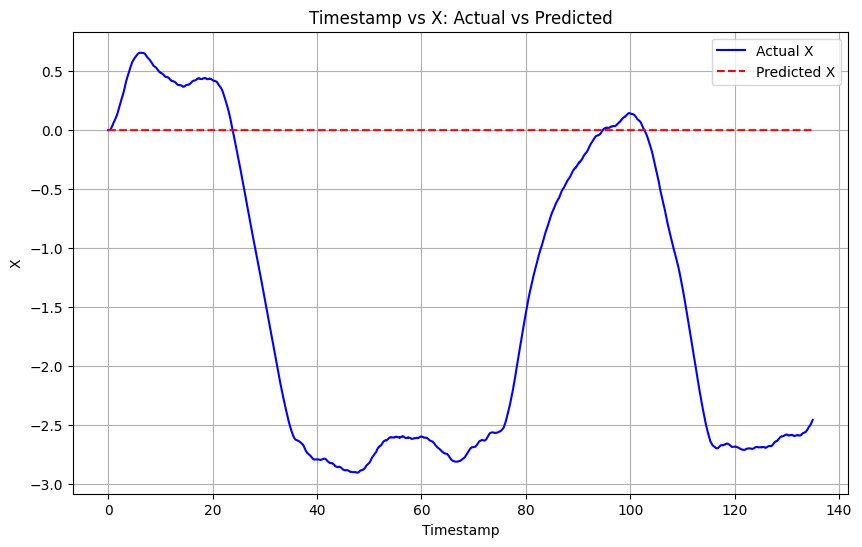

In [ ]:
model = Sequential([
    Dense(64, activation=activations.softplus, input_dim=100),
    Dense(10, activation=activations.softplus)
])

model.compile(optimizer='adam', loss='mse')